# US Regional Sales Dataset

Fictitious sales data for a certain company across the US regions


# Objective


The target will be to optimization of customer and employee segment using unsupervised machine learning techniques using:

* K Means (By Elbow and silhouette Method)
* Mini Batch KMeans 
* Meanshift Clustering 
* Hierarchical Agglomerative Clustering

# Business Understanding

In big ecommerce businesses customer segmentation and clustering and employee ranking is important and to optimize the resourcces and maximize the profit best pairing of both is necessaary for:

* Increasing revenue 
* Increasing customer retention
* Discovering Trends and patterns in data 
* Defining customers at risk

#  Features


* OrderNumber: Order number. Nominal, a 10-digit integral number uniquely assigned to each transaction. 

* WarehouseCode: 

# EDA and Pre Processing

In [2]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.metrics import silhouette_samples, silhouette_score
from pandas.plotting import scatter_matrix
from sklearn.cluster import MiniBatchKMeans
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_excel('US_Regional_Sales_Data.xlsx')

In [4]:
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [5]:
data.shape

(7991, 16)

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Price        7991 n

In [7]:
data.dtypes


OrderNumber                 object
Sales Channel               object
WarehouseCode               object
ProcuredDate        datetime64[ns]
OrderDate           datetime64[ns]
ShipDate            datetime64[ns]
DeliveryDate        datetime64[ns]
CurrencyCode                object
_SalesTeamID                 int64
_CustomerID                  int64
_StoreID                     int64
_ProductID                   int64
Order Quantity               int64
Discount Applied           float64
Unit Price                 float64
Unit Cost                  float64
dtype: object

In [8]:
data.isnull().sum()

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Price          0
Unit Cost           0
dtype: int64

In [9]:
data['Sales Channel'].value_counts()

In-Store       3298
Online         2425
Distributor    1375
Wholesale       893
Name: Sales Channel, dtype: int64

In [10]:
data['_SalesTeamID'].describe()

count    7991.000000
mean       14.384307
std         7.986086
min         1.000000
25%         8.000000
50%        14.000000
75%        21.000000
max        28.000000
Name: _SalesTeamID, dtype: float64

In [11]:
data['_SalesTeamID'].nunique()

28

In [12]:
data['_SalesTeamID'].value_counts(ascending=False)
#to check which SalesTeam ID has most sales

13    340
18    316
8     315
12    314
7     303
1     302
16    298
3     296
21    296
26    296
19    293
4     292
11    289
20    288
9     285
24    284
5     283
23    277
17    275
27    274
15    271
22    266
6     265
14    261
10    260
25    259
28    247
2     246
Name: _SalesTeamID, dtype: int64

In [13]:
data['_CustomerID'].describe()

count    7991.000000
mean       25.457014
std        14.414883
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: _CustomerID, dtype: float64

In [14]:
data['_CustomerID'].nunique()

50

In [15]:
data['_CustomerID'].value_counts(ascending=False)
#to check which customer ID has most sales

12    210
18    186
3     181
29    179
11    178
34    176
39    176
17    175
32    173
48    172
9     171
13    171
47    168
4     167
20    167
19    165
23    164
21    164
50    163
25    162
41    161
42    161
5     159
30    159
10    158
46    157
14    157
33    156
45    156
36    156
44    156
7     153
26    153
1     152
37    152
49    152
31    152
43    151
24    151
38    150
40    150
28    145
35    145
27    144
6     143
8     142
15    142
22    140
2     135
16    135
Name: _CustomerID, dtype: int64

In [16]:
data["Unit Price"] = [float(str(i).replace(",", "")) for i in data["Unit Price"]]
data["Unit Cost"] = [float(str(i).replace(",", "")) for i in data["Unit Cost"]]

## Sales Team RPT

In [17]:
data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [32]:
data["Total_Price"]= data["Unit Price"] * data["Order Quantity"]
data

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Toatal_Cost,Total_Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181,9815.5,9815.5
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660,11818.8,11818.8
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220,1775.5,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687,18599.2,18599.2
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144,14579.2,14579.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,2020-09-26,2020-12-30,2021-01-07,2021-01-14,USD,9,41,339,29,1,0.075,234.5,121.940,234.5,234.5
7987,SO - 0008088,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-02,2021-01-04,USD,14,29,202,3,6,0.050,3202.6,1921.560,19215.6,19215.6
7988,SO - 0008089,Online,WARE-UHY1004,2020-09-26,2020-12-30,2021-01-23,2021-01-26,USD,14,32,241,35,5,0.200,3825.7,2792.761,19128.5,19128.5
7989,SO - 0008090,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-20,2021-01-25,USD,20,42,112,36,8,0.100,1072.0,804.000,8576.0,8576.0


In [33]:
grouped_SalesTeam = data.groupby('_SalesTeamID',as_index= False)['Total_Price'].sum().sort_values(by='Total_Price', ascending=False)
grouped_SalesTeam

,_SalesTeamID,Total_Price
25,26,3346569.6
0,1,3261359.0
12,13,3242525.3
7,8,3228803.7
10,11,3217192.6
18,19,3191605.3
11,12,3181160.0
23,24,3098435.1
20,21,3050999.1
17,18,3043160.1


In [34]:
grouped_SalesTeam["Frequency"] = data.groupby(by=['_SalesTeamID'], as_index=False)['_SalesTeamID'].count()
grouped_SalesTeam.columns = ['SalesTeamID','Total_Price','Frequency']
grouped_SalesTeam.head()

,_SalesTeamID,Total_Price,Frequency
25,26,3346569.6,296
0,1,3261359.0,302
12,13,3242525.3,340
7,8,3228803.7,315
10,11,3217192.6,289


In [38]:
grouped_SalesTeam["RPT"]= grouped_SalesTeam["Total_Price"] / grouped_SalesTeam["Frequency"]
grouped_SalesTeam.sort_values(by="RPT", ascending=False)
grouped_SalesTeam.head()

,_SalesTeamID,Total_Price,Frequency,RPT
25,26,3346569.6,296,11305.978378
0,1,3261359.0,302,10799.201987
12,13,3242525.3,340,9536.839118
7,8,3228803.7,315,10250.170476
10,11,3217192.6,289,11132.154325


In [173]:
grouped_SalesTeam["Ranked_SalesTeam_ID"] = np.arange(1, len(grouped_SalesTeam)+1)
grouped_SalesTeam

,_SalesTeamID,Total_Price,Frequency,RPT,Ranked_SalesTeam_ID
25,26,3346569.6,296,11305.978378,1
0,1,3261359.0,302,10799.201987,2
12,13,3242525.3,340,9536.839118,3
7,8,3228803.7,315,10250.170476,4
10,11,3217192.6,289,11132.154325,5
18,19,3191605.3,293,10892.850853,6
11,12,3181160.0,314,10131.082803,7
23,24,3098435.1,284,10909.982746,8
20,21,3050999.1,296,10307.429392,9
17,18,3043160.1,316,9630.253481,10


# Recency

In [20]:
import datetime as dt
max_date = data["OrderDate"].max()
max_date

Timestamp('2020-12-30 00:00:00')

In [47]:
recency_df = data.groupby(by='_CustomerID', as_index=False)['OrderDate'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (max_date - x).days)
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df

,CustomerID,Recency
0,1,7
1,2,7
2,3,8
3,4,3
4,5,28
5,6,2
6,7,1
7,8,3
8,9,6
9,10,13


In [44]:
recency_df.head(50)

,CustomerID,Recency
0,1,7
1,2,7
2,3,8
3,4,3
4,5,28
5,6,2
6,7,1
7,8,3
8,9,6
9,10,13


# Frequency

In [54]:
data["CustomerID"] = data["_CustomerID"]
data

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Toatal_Cost,Total_Price,CustomerID
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181,9815.5,9815.5,15
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660,11818.8,11818.8,20
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220,1775.5,1775.5,16
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687,18599.2,18599.2,48
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144,14579.2,14579.2,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,2020-09-26,2020-12-30,2021-01-07,2021-01-14,USD,9,41,339,29,1,0.075,234.5,121.940,234.5,234.5,41
7987,SO - 0008088,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-02,2021-01-04,USD,14,29,202,3,6,0.050,3202.6,1921.560,19215.6,19215.6,29
7988,SO - 0008089,Online,WARE-UHY1004,2020-09-26,2020-12-30,2021-01-23,2021-01-26,USD,14,32,241,35,5,0.200,3825.7,2792.761,19128.5,19128.5,32
7989,SO - 0008090,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-20,2021-01-25,USD,20,42,112,36,8,0.100,1072.0,804.000,8576.0,8576.0,42


In [55]:
frequency_df = data.groupby(by=['CustomerID'], as_index=False)['_CustomerID'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()


,CustomerID,Frequency
0,1,152
1,2,135
2,3,181
3,4,167
4,5,159


# Monetary Value

In [49]:
data

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Toatal_Cost,Total_Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181,9815.5,9815.5
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660,11818.8,11818.8
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220,1775.5,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687,18599.2,18599.2
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144,14579.2,14579.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,2020-09-26,2020-12-30,2021-01-07,2021-01-14,USD,9,41,339,29,1,0.075,234.5,121.940,234.5,234.5
7987,SO - 0008088,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-02,2021-01-04,USD,14,29,202,3,6,0.050,3202.6,1921.560,19215.6,19215.6
7988,SO - 0008089,Online,WARE-UHY1004,2020-09-26,2020-12-30,2021-01-23,2021-01-26,USD,14,32,241,35,5,0.200,3825.7,2792.761,19128.5,19128.5
7989,SO - 0008090,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-20,2021-01-25,USD,20,42,112,36,8,0.100,1072.0,804.000,8576.0,8576.0


In [51]:
monetary_df = data.groupby(by='_CustomerID',as_index=False).agg({'Total_Price': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,1,1322278.5
1,2,1346264.5
2,3,1831947.5
3,4,1770582.2
4,5,1609232.8


# RFM Analysis

In [56]:
rf_df = recency_df.merge(frequency_df,on='CustomerID')
rfm_df = rf_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
1,7,152,1322278.5
2,7,135,1346264.5
3,8,181,1831947.5
4,3,167,1770582.2
5,28,159,1609232.8


In [57]:
numerical=list(rfm_df.columns)

# Visualize

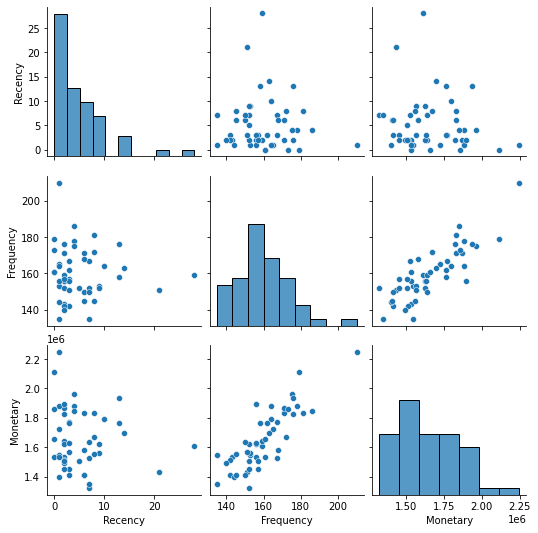

In [58]:
sns.pairplot(rfm_df)

The above diagram shows pairplot of all the numerical features.

<AxesSubplot:>

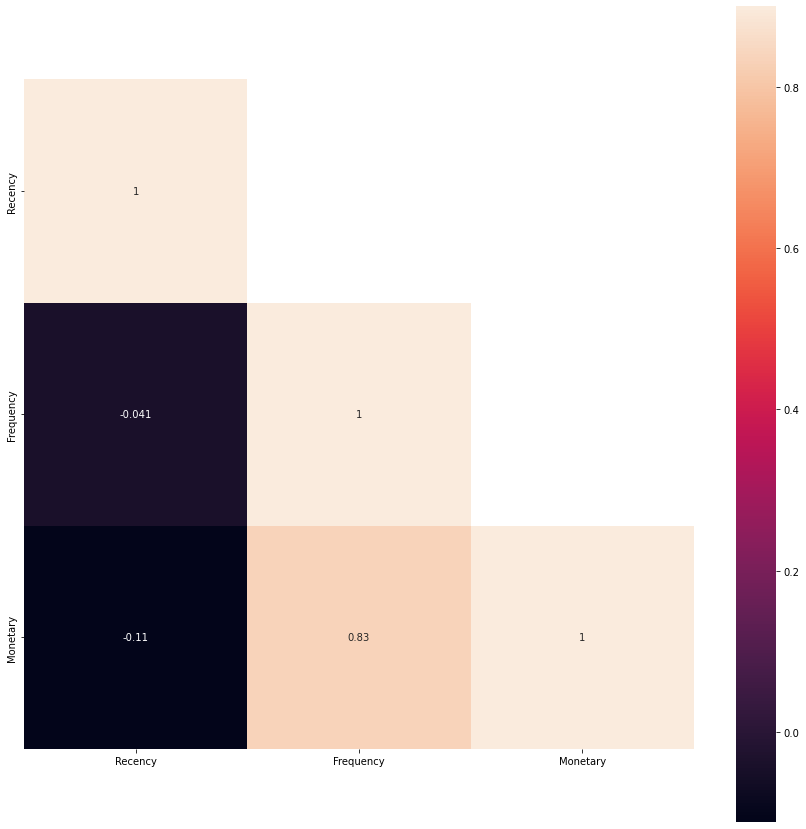

In [60]:
#create correlation
corr=rfm_df.corr()

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

The heatmap shows best correlation between Frequency and Monetary.

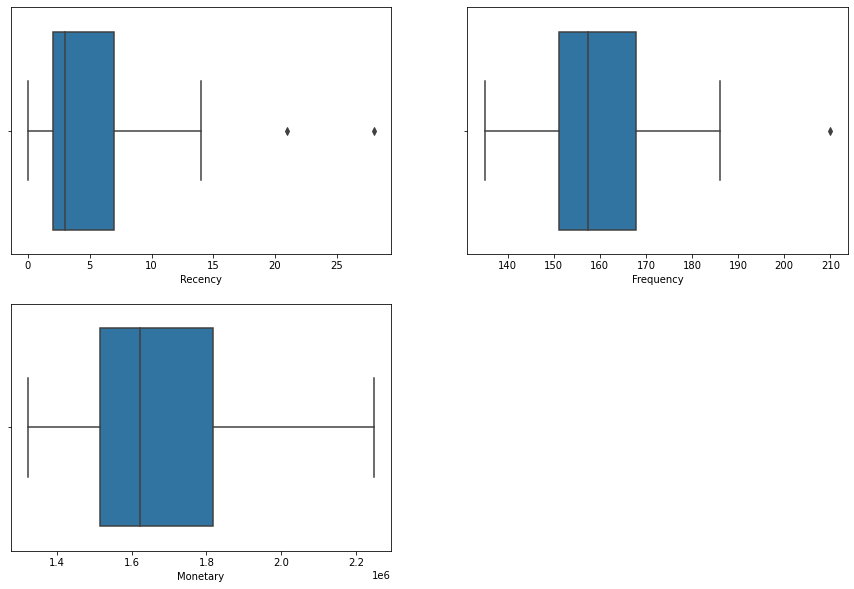

In [61]:
fig = plt.figure(figsize = (15,10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = rfm_df, x = num)
plt.show()

Plotting Box plots to find outliers - The box plot shows outliers in the numerical features

No handles with labels found to put in legend.


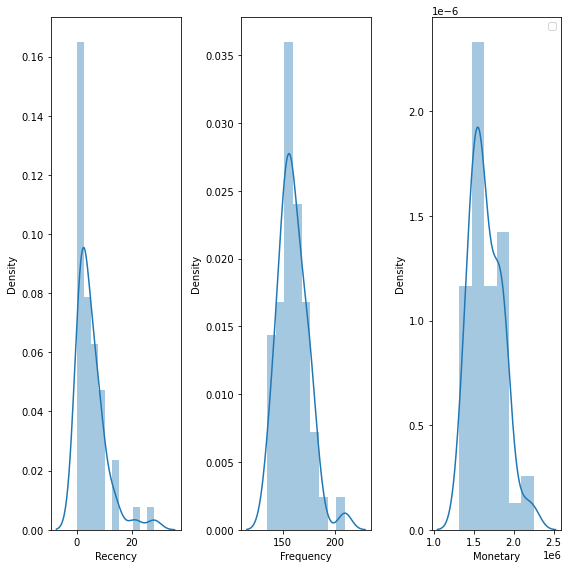

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(8,8))
sns.distplot(rfm_df["Recency"], ax=ax1)
sns.distplot(rfm_df["Frequency"], ax=ax2)
sns.distplot(rfm_df["Monetary"], ax=ax3)
plt.tight_layout()
plt.legend()

There is little to no skewness so we can proceed without normalzation

#  Models

### 1- K-means (By Elbow Method & silhouette Method)
 
### 2- Mini Batch K-means

### 3- Mean Shift

### 4- Agglomerative Clustering

### Elbow Method

First we use the Elbow Method to determine the optimal k value for the k-means

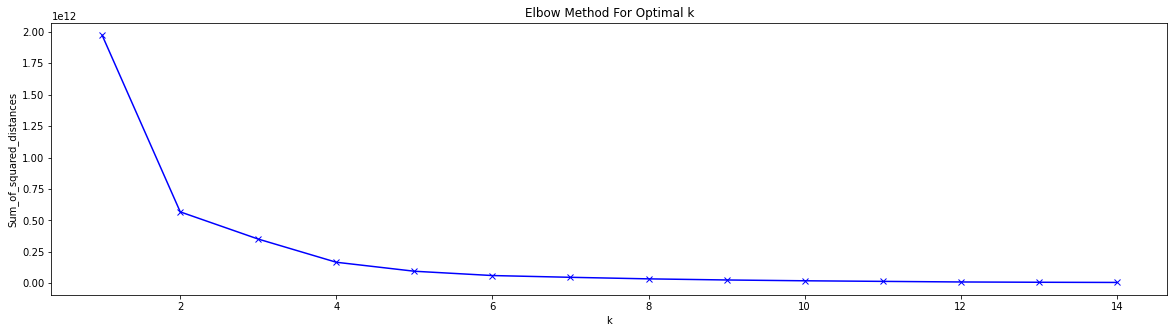

In [65]:
from sklearn.cluster import KMeans as km

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(rfm_df)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [66]:
print(Sum_of_squared_distances)

[1971708367443.2283, 567503366102.8872, 351107962511.77954, 166846621552.99725, 95394234016.46378, 61146257616.08369, 47139200569.93215, 34758759628.5715, 25914213089.154045, 19514893486.9346, 14770401872.301798, 10039387856.546095, 7719206749.121452, 6247224320.592499]


From the figure above we can see that the most optimal values are 2. So we choose 2 as the k values of the k-means model.

### 1- K Means

In [131]:
from mpl_toolkits.mplot3d import Axes3D
matrix = rfm_df.to_numpy()
model = KMeans(n_clusters=2)
model.fit(matrix)
kmeans_labels = model.labels_

K-Means


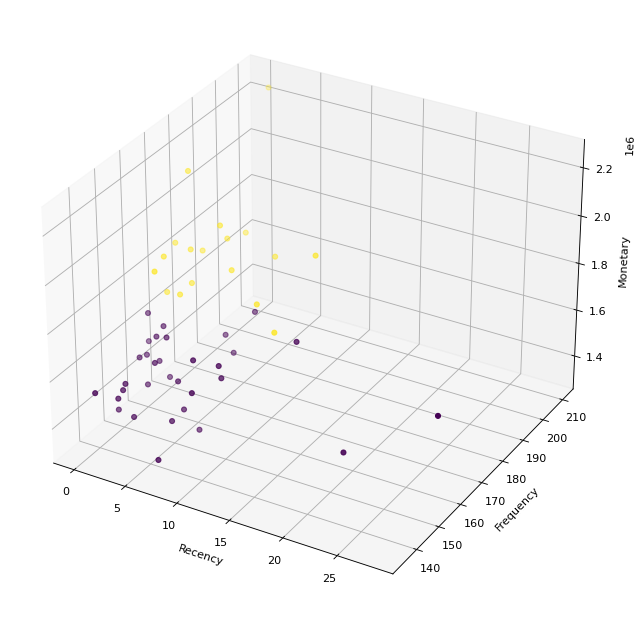

In [132]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=kmeans_labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("K-Means")

### Silhouette Method

In [77]:
matrix = rfm_df.to_numpy()
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.6412186775122758
For n_clusters = 3 The average silhouette_score is : 0.6336604452633182
For n_clusters = 4 The average silhouette_score is : 0.6017559927205639
For n_clusters = 5 The average silhouette_score is : 0.6226514875394406
For n_clusters = 6 The average silhouette_score is : 0.5877678079421531
For n_clusters = 7 The average silhouette_score is : 0.6117203730156803
For n_clusters = 8 The average silhouette_score is : 0.6192941339201002
For n_clusters = 9 The average silhouette_score is : 0.6051890989054136


In [80]:
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.641


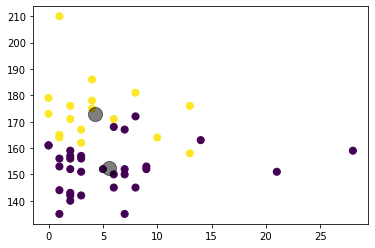

In [81]:
#create a scatter plot
plt.scatter(matrix[:, 0], matrix[:, 1], c=clusters_customers, s=50, cmap='viridis')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

###  2- Mini Batch K Means

#### With Batch Size 1000

MiniBatch K-Means with Batch Size 1000


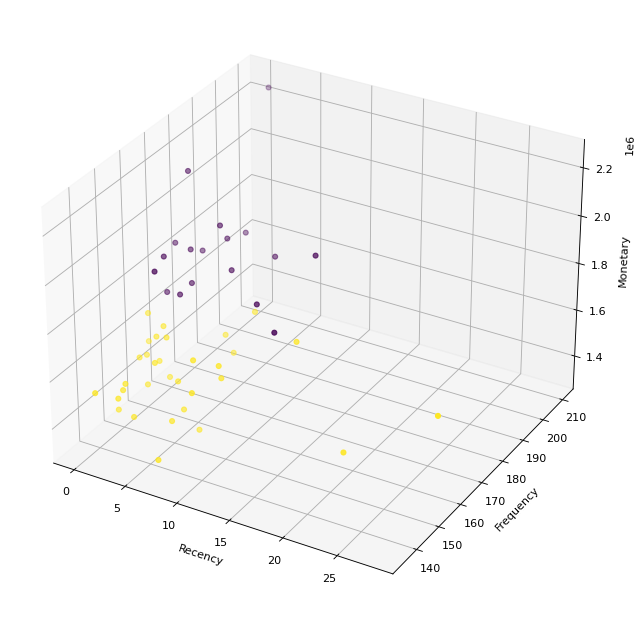

In [133]:
from sklearn.cluster import MiniBatchKMeans
from mpl_toolkits.mplot3d import Axes3D
matrix = rfm_df.to_numpy()
model = MiniBatchKMeans(n_clusters=2, init='k-means++', max_iter=100, batch_size=1000)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=mkmeans_labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("MiniBatch K-Means with Batch Size 1000")

#### With Batch Size 100

MiniBatch K-Means with Batch Size 40


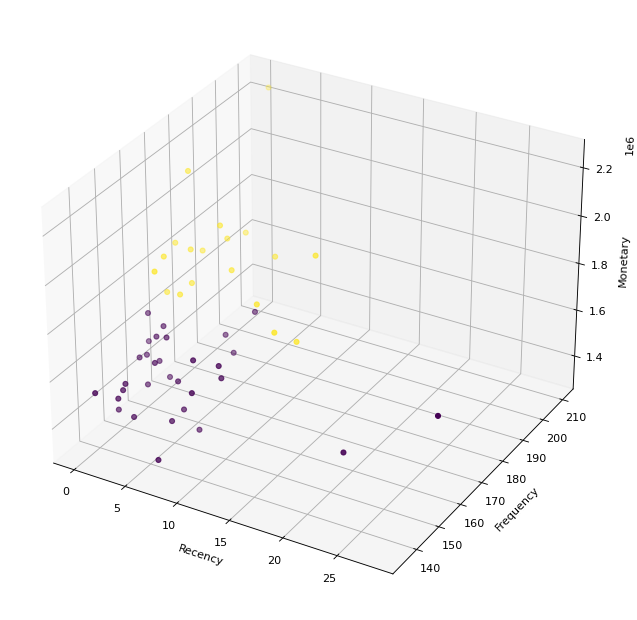

In [154]:
from sklearn.cluster import MiniBatchKMeans
from mpl_toolkits.mplot3d import Axes3D
matrix = rfm_df.to_numpy()
model = MiniBatchKMeans(n_clusters=2, init='k-means++', max_iter=1000, batch_size=40)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=mkmeans_labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("MiniBatch K-Means with Batch Size 40")

### 3- Mean Shift Clustering

#### Quantile 0.09

Mean Shift Clusterning
Bandwidth is : 31558.480094419807
Number of estimated clusters : 10


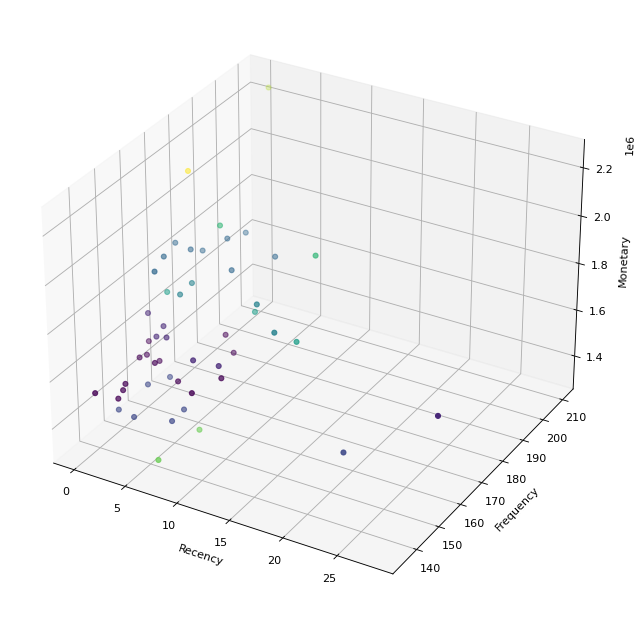

In [85]:
# Mean Shift Clustering

from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
matrix = rfm_df.to_numpy()

bandwidth=estimate_bandwidth(matrix,quantile=0.09)


analyzer=MeanShift(bandwidth)
analyzer.fit(matrix)
labels=analyzer.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("Mean Shift Clusterning")

labels_unique=np.unique(labels)
n_clusters_=len(labels_unique)
#print the labels of each data 
print("Bandwidth is :",bandwidth)
print("Number of estimated clusters : %d" % n_clusters_)

Mean Shift Clusterning
Bandwidth is : 157835.6528299326
Number of estimated clusters : 3


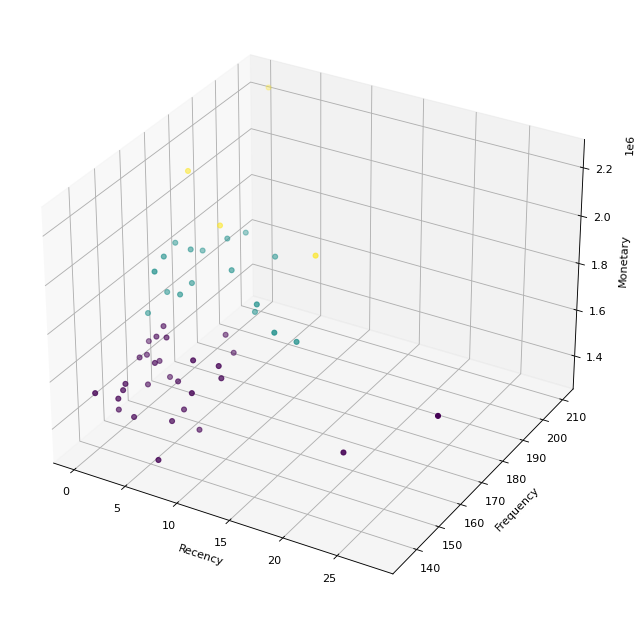

In [120]:
# Mean Shift Clustering

from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
matrix = rfm_df.to_numpy()

bandwidth=estimate_bandwidth(matrix,quantile=0.4)


analyzer=MeanShift(bandwidth)
analyzer.fit(matrix)
labels=analyzer.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("Mean Shift Clusterning")

labels_unique=np.unique(labels)
n_clusters_=len(labels_unique)
#print the labels of each data 
print("Bandwidth is :",bandwidth)
print("Number of estimated clusters : %d" % n_clusters_)

After lot of Tweaking got 3 clusters at Quantile = 0.4 

### 4- Agglomerative Clustering

#### Dendrogram with all 4 types of Linkages

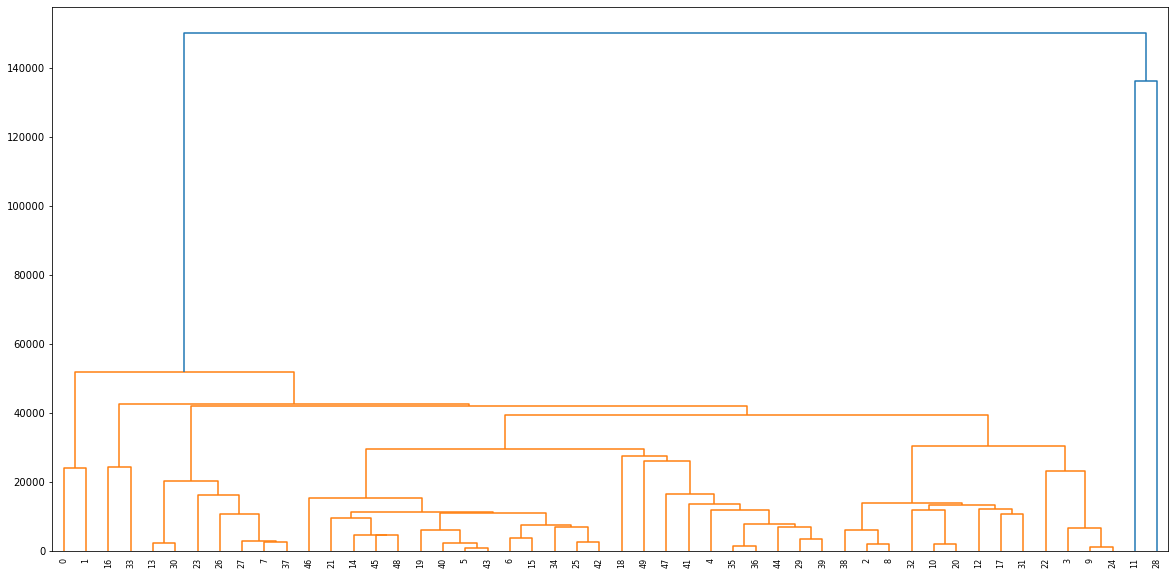

In [121]:
# Single
import scipy.cluster.hierarchy as sch
matrix = rfm_df.to_numpy()

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(matrix, method='single'))

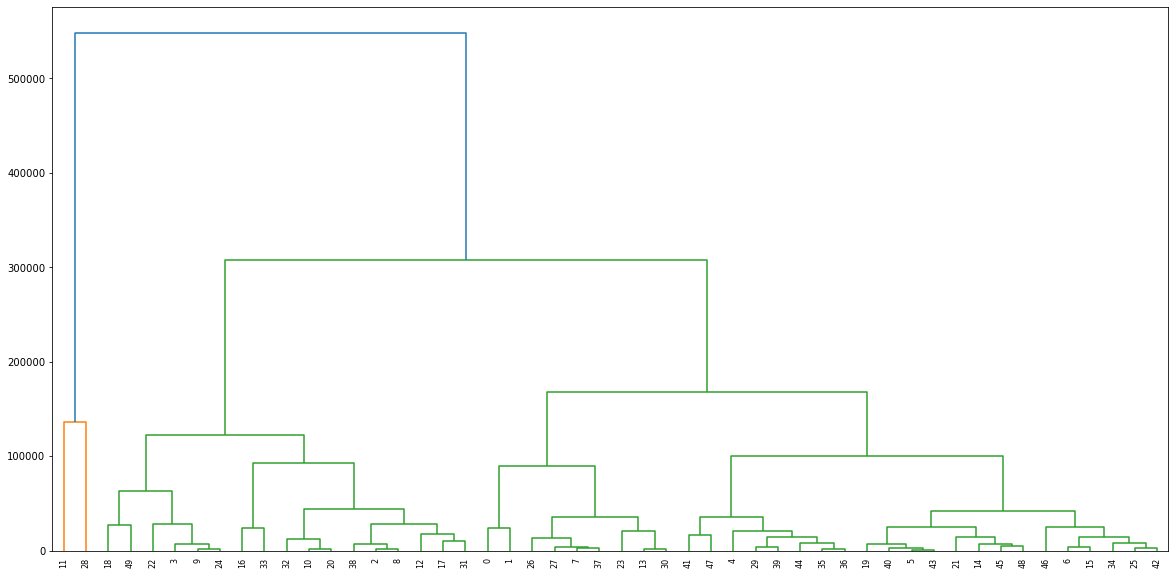

In [122]:
# Average
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(matrix, method='average'))

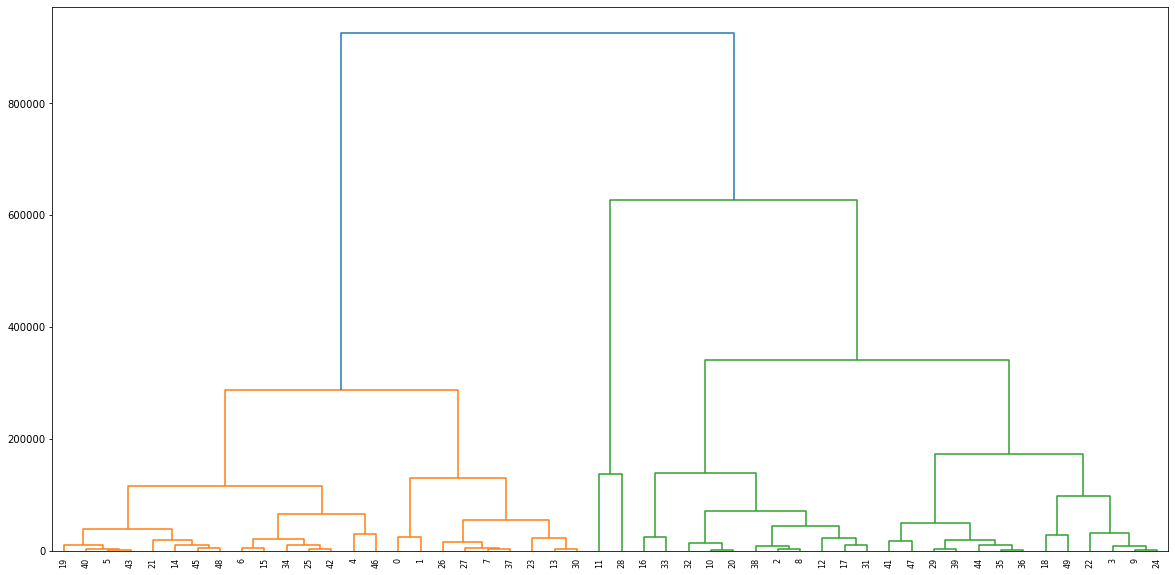

In [123]:
# Complete
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(matrix, method='complete'))

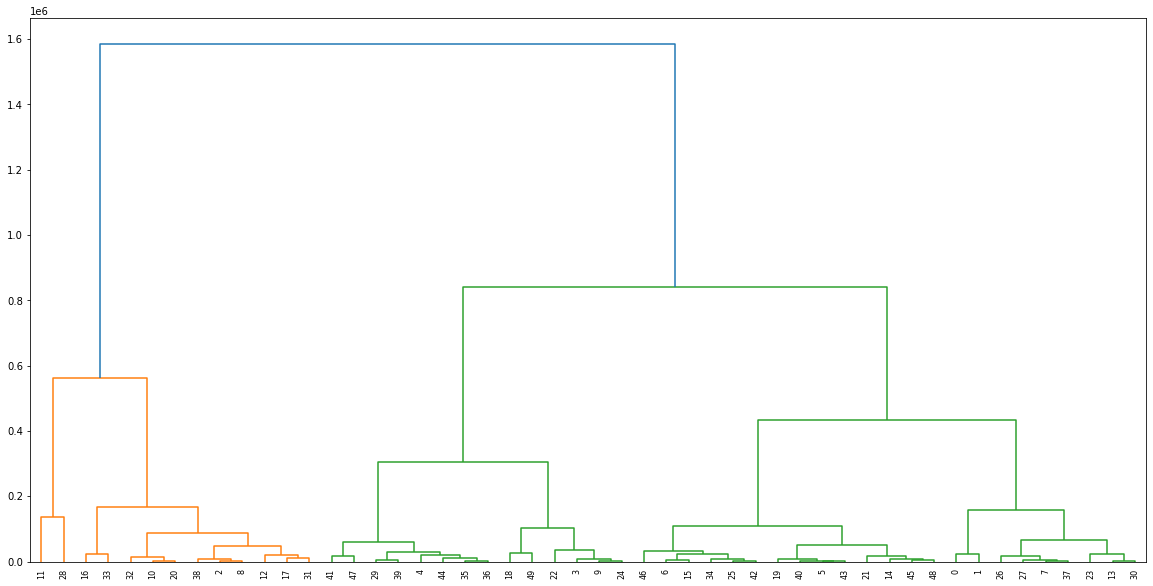

In [124]:
# Ward
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(matrix, method='ward'))

Hierarchical Agglomerative Clustering


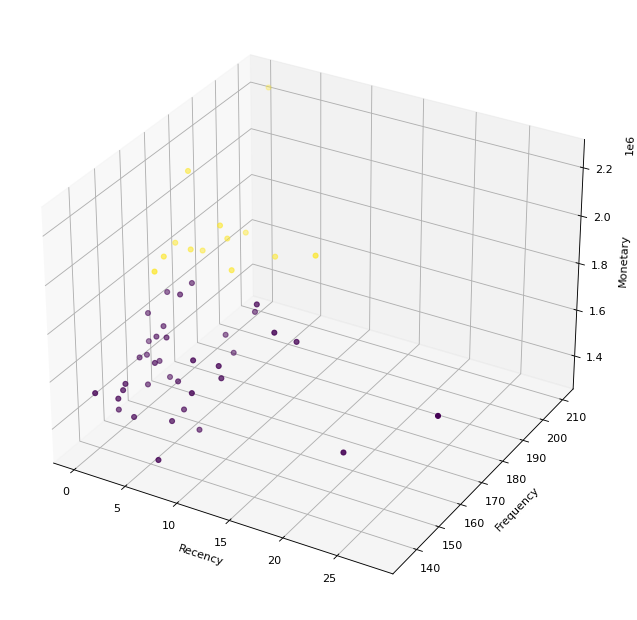

In [125]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
model.fit(matrix)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=hac_labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

# Clusters

## Number of customers in each cluster

### Clusters K-Means

In [157]:
print("*******Number of customers in each cluster generated by K-Means (Elbow Method)*******")
pd.DataFrame(pd.Series(kmeans_labels).value_counts(), columns = ['Number of Customers']).T

*******Number of customers in each cluster generated by K-Means (Elbow Method)*******


,0,1
Number of Customers,32,18


In [158]:
# Clusters by K-Means (Elbow Method)
DS3_clustered_mkmeans = rfm_df.assign(Cluster=kmeans_labels)
grouped_mkmeans = DS3_clustered_mkmeans.groupby(['Cluster']).mean().round(1)
grouped_mkmeans

,Recency,Frequency,Monetary
Cluster,,,
0,5.6,152.5,1528167.2
1,4.3,172.9,1877298.7


### Clusters Mini Batch K-Means

In [159]:
print("*******Number of customers in each cluster generated by Mini Batch K-Means*******")
pd.DataFrame(pd.Series(mkmeans_labels).value_counts(), columns = ['Number of Customers']).T

*******Number of customers in each cluster generated by Mini Batch K-Means*******


,0,1
Number of Customers,31,19


In [160]:
# Clusters by Mini Batch K-Means
DS3_clustered_mkmeans = rfm_df.assign(Cluster=kmeans_labels)
grouped_mkmeans = DS3_clustered_mkmeans.groupby(['Cluster']).mean().round(1)
grouped_mkmeans

,Recency,Frequency,Monetary
Cluster,,,
0,5.6,152.5,1528167.2
1,4.3,172.9,1877298.7


### Clusters Meanshift

In [161]:
print("*******Number of customers in each cluster generated by Meanshift*******")
pd.DataFrame(pd.Series(labels).value_counts(), columns = ['Number of Customers']).T

*******Number of customers in each cluster generated by Meanshift*******


,0,1,2
Number of Customers,29,17,4


In [162]:
# Clusters by Meanshift
DS3_clustered_mkmeans = rfm_df.assign(Cluster=labels)
grouped_meanshift = DS3_clustered_mkmeans.groupby(['Cluster']).mean().round(1)
grouped_meanshift

,Recency,Frequency,Monetary
Cluster,,,
0,5.4,151.1,1513144.9
1,4.8,168.7,1797125.2
2,4.5,185.0,2065099.1


### Clusters Agglomerative Clustering

In [163]:
print("*******Number of customers in each cluster generated by Agglomerative Clustering*******")
pd.DataFrame(pd.Series(hac_labels).value_counts(), columns = ['Number of Customers']).T

*******Number of customers in each cluster generated by Agglomerative Clustering*******


,0,1
Number of Customers,37,13


In [164]:
# Clusters by Agglomerative Clusterning
DS3_clustered_mkmeans = rfm_df.assign(Cluster=hac_labels)
grouped_hac = DS3_clustered_mkmeans.groupby(['Cluster']).mean().round(1)
grouped_hac

,Recency,Frequency,Monetary
Cluster,,,
0,5.6,153.9,1559884.2
1,3.6,176.6,1921308.5


# Final Results

In [165]:
## Cluster By K Means
DS3_clustered_kmeans = rfm_df.assign(Cluster=mkmeans_labels)
DS3_clustered_kmeans.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
1,7,152,1322278.5,0
2,7,135,1346264.5,0
3,8,181,1831947.5,1
4,3,167,1770582.2,1
5,28,159,1609232.8,0


In [166]:
grouped_mkmeans = DS3_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_mkmeans

,Recency,Frequency,Monetary
Cluster,,,
0,5.3,152.1,1522746.0
1,4.8,172.4,1867768.5
